# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [111]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

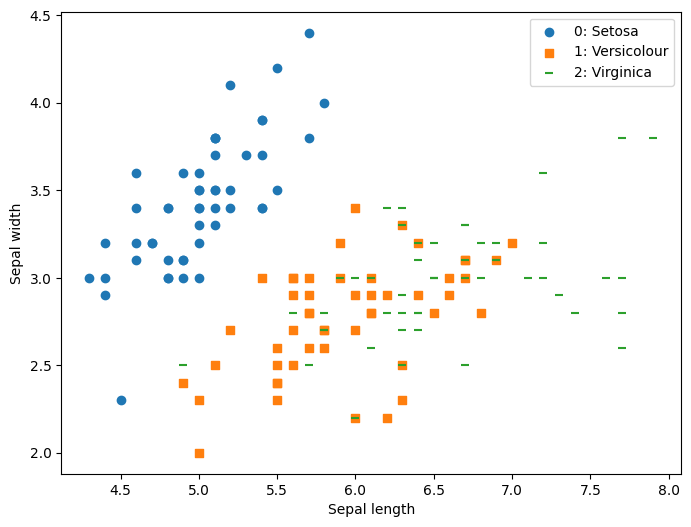

In [112]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a perceptron to distinguish Setosa from the other two varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

In [125]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""

    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._learning_rate = 0.1 # this seems necessary
        self._w = [0, 0]
        self._b = 0

    def predict(self, x, verbose=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input.

        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.

        The returned output should be 1 or 0.

        Use the "verbose" flag to print debugging info if desired.
        """
        # This is the step function of the perceptron

        z = self.weighted_sum(x)

        if verbose:
            # Print computation results here if desired.
            print("Calculated Z (weighted sum): ", z)
            pass
        return self.activation(z)

    # Weighted sum is used in the prediction/step function to calculate
    def weighted_sum(self, x):
        return np.dot(x, self._w) + self._b

    # Activate those neurons (technically this is end result of the step function)
    def activation(self, z, threshold=0.0):
        return np.where(z >= threshold, 1.0, 0.0)

    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)

    def update_weights(self, x, target, verbose=False):
        """Update the perceptron's weights according to the perceptron learning rule.

        x is an input example, and target is the desired output.

        This function should modify self._b and self._w. It has no return value.

        Use the "verbose" flag to print debugging info if desired.
        """
        current_output = self.predict(x)
        error = target - current_output
        weight_correction = self._learning_rate * error
        self._w += weight_correction * x
        self._b += weight_correction

    def train(self, x, y, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data x with
        corresponding target values y.

        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)):
                example_x = x[j]
                example_y = y[j]

                # Train the perceptron on this input/output example pair (example_x, example_y).
                # This should update the perceptron's weights.

                z = self.weighted_sum(x)
                y_predict = self.activation(z)
                self.update_weights(example_x, example_y)

                if verbose:
                    print('Input:', example_x)
                    print('Target:', example_y)
                    print('Z:', z)
                    print('Predicted:', y_predict)

            # Print some useful info during training.
            print('Weights:', self._w)
            print('Bias:', self._b)
            acc = self.accuracy(x, y)
            print('Accuracy: %.3f%%' % (acc * 100))
            print()


## Set up dataset for training a Setosa/not-Setosa classifier

In [114]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)

    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [115]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [116]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [117]:
p = Perceptron()

p.train(X_shuffled, y_shuffled, 100, False)

Iter #0
Weights: [ 1.03 -1.71]
Bias: -0.30000000000000004
Accuracy: 99.333%

Iter #1
Weights: [ 1.44 -2.23]
Bias: -0.4
Accuracy: 98.667%

Iter #2
Weights: [ 1.69 -2.73]
Bias: -0.5
Accuracy: 99.333%

Iter #3
Weights: [ 1.86 -3.03]
Bias: -0.6
Accuracy: 99.333%

Iter #4
Weights: [ 1.98 -3.29]
Bias: -0.7
Accuracy: 98.667%

Iter #5
Weights: [ 2.24 -3.25]
Bias: -0.7
Accuracy: 92.667%

Iter #6
Weights: [ 2.17 -3.49]
Bias: -0.7999999999999999
Accuracy: 99.333%

Iter #7
Weights: [ 2.29 -3.75]
Bias: -0.8999999999999999
Accuracy: 99.333%

Iter #8
Weights: [ 2.55 -3.71]
Bias: -0.8999999999999999
Accuracy: 93.333%

Iter #9
Weights: [ 2.46 -3.93]
Bias: -0.9999999999999999
Accuracy: 99.333%

Iter #10
Weights: [ 2.57 -4.19]
Bias: -1.0999999999999999
Accuracy: 99.333%

Iter #11
Weights: [ 2.72 -4.08]
Bias: -1.0999999999999999
Accuracy: 98.667%

Iter #12
Weights: [ 2.71 -4.38]
Bias: -1.2
Accuracy: 99.333%

Iter #13
Weights: [ 2.97 -4.34]
Bias: -1.2
Accuracy: 95.333%

Iter #14
Weights: [ 2.81 -4.59]
Bias

## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary.

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [118]:
def get_y_decision_boundary(x1, perceptron):
    x2 = 0
    w1 = perceptron._w[0]
    w2 = perceptron._w[1]
    b = perceptron._b
    x2 = (-b - w1*x1) / w2
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [119]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

(2.3456086286594604, 4.902773497688721)

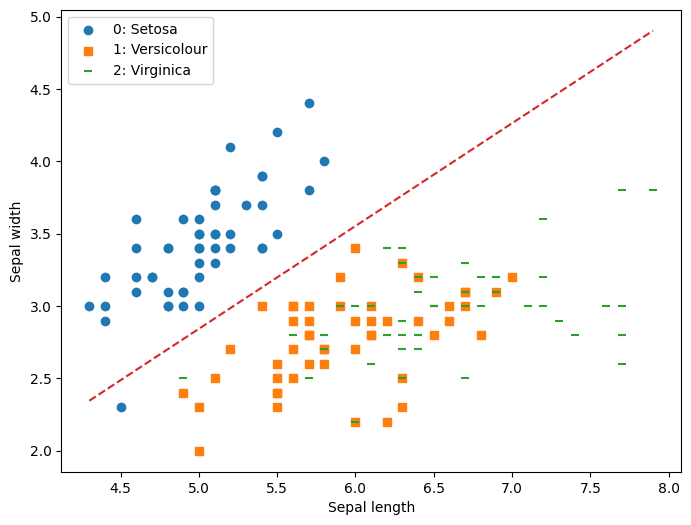

In [120]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [121]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [122]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()

# Train the perceptron

p2.train(X_shuffled, y_shuffled, 100, False)

Iter #0
Weights: [-0.87  1.55]
Bias: 0.5
Accuracy: 70.667%

Iter #1
Weights: [-1.33  1.95]
Bias: 0.7999999999999999
Accuracy: 65.333%

Iter #2
Weights: [-1.37  2.51]
Bias: 1.2
Accuracy: 70.667%

Iter #3
Weights: [-1.53  2.73]
Bias: 1.5000000000000002
Accuracy: 70.667%

Iter #4
Weights: [-1.77  2.64]
Bias: 1.7000000000000004
Accuracy: 67.333%

Iter #5
Weights: [-1.93  2.84]
Bias: 2.0000000000000004
Accuracy: 67.333%

Iter #6
Weights: [-2.09  3.04]
Bias: 2.3000000000000007
Accuracy: 67.333%

Iter #7
Weights: [-1.97  3.27]
Bias: 2.600000000000001
Accuracy: 71.333%

Iter #8
Weights: [-2.19  3.12]
Bias: 2.800000000000001
Accuracy: 68.000%

Iter #9
Weights: [-2.29  3.25]
Bias: 3.1000000000000014
Accuracy: 68.667%

Iter #10
Weights: [-2.39  3.38]
Bias: 3.4000000000000017
Accuracy: 69.333%

Iter #11
Weights: [-2.22  3.46]
Bias: 3.700000000000002
Accuracy: 72.667%

Iter #12
Weights: [-2.11  3.27]
Bias: 3.9000000000000017
Accuracy: 75.333%

Iter #13
Weights: [-2.37  3.09]
Bias: 4.100000000000001

# Calculate the decision boundary and plot it.

In [123]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

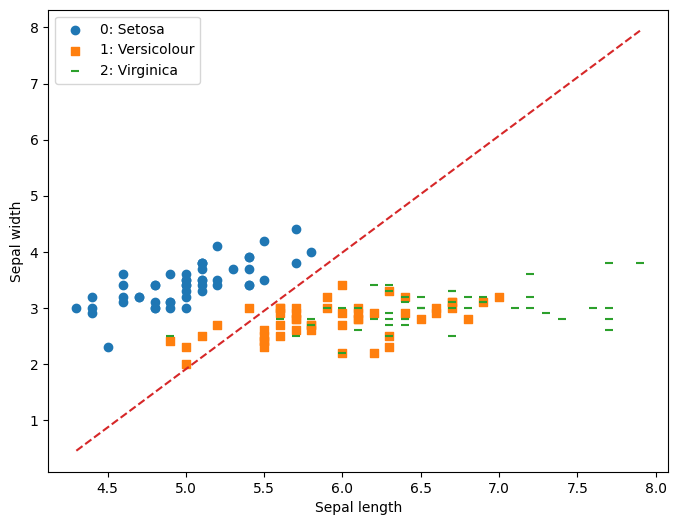

In [124]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare?

# Analysis

1. The first Setosa Perceptron did markedly better at distinguishing (accuracy) between the different data with an accuracy of 99.333% which is indicated pretty clearly by the linear divide and one single miss.
2. The second Virginica Perceptron did less well with a lower accuracy (70%) as indicated by the model. The min and max are also skewed so the graph looks a little different.
3. The network structure is pretty simple since this is a Perceptron. It has input layers and potentially a hidden layer, a summation/iteration function (weighted_sum) and an activation function (step function) that calculates if the output is 1 or 0.

In [ ]:
%%shell

jupyter nbconvert --to html /content/Lab01a.ipynb